In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm



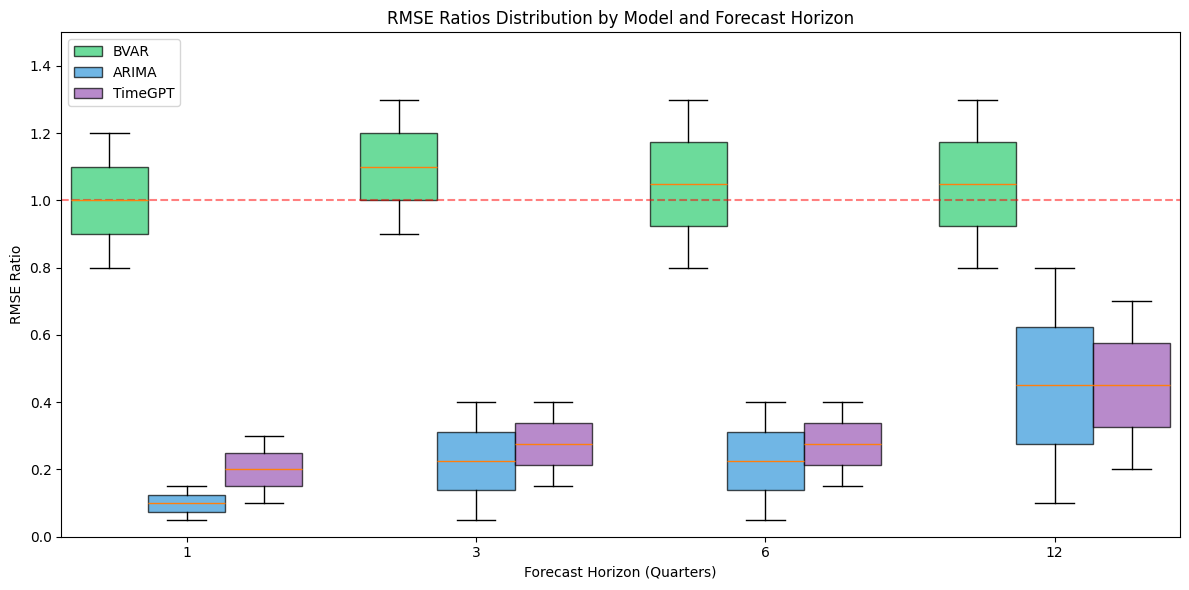

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Approximate data based on the plots
# Format: [median, Q1, Q3, min, max, (outliers)]
data = {
    'bvar': {
        1: [1.0, 0.8, 1.2, 0.6, 1.3],
        3: [1.2, 0.9, 1.3, 0.55, 1.9],
        6: [1.0, 0.8, 1.3, 0.55, 1.9],
        12: [1.1, 0.8, 1.3, 0.75, 1.9]
    },
    'arima': {
        1: [0.1, 0.05, 0.15, 0.01, 0.35],
        3: [0.1, 0.05, 0.4, 0.01, 0.9],
        6: [0.1, 0.05, 0.4, 0.02, 0.85],
        12: [0.2, 0.1, 0.8, 0.1, 1.5]
    },
    'timegpt': {
        1: [0.25, 0.1, 0.3, 0.02, 0.7],
        3: [0.3, 0.15, 0.4, 0.05, 0.9, 0.95],
        6: [0.3, 0.15, 0.4, 0.05, 0.85, 1.45],
        12: [0.6, 0.2, 0.7, 0.05, 1.2, 2.2]
    }
}

plt.figure(figsize=(12, 6))

# Define colors
bvar_color = '#2ecc71'    # green
arima_color = '#3498db'   # sky blue
timegpt_color = '#9b59b6' # light purple

# Define positions for the boxes
horizons = [1, 3, 6, 12]
positions = np.arange(len(horizons)) * 3
width = 0.8

# Create boxplots
bvar_plot = plt.boxplot([[data['bvar'][h][1], data['bvar'][h][2]] for h in horizons],
                       positions=positions - width,
                       widths=width,
                       patch_artist=True,
                       showfliers=False)

arima_plot = plt.boxplot([[data['arima'][h][1], data['arima'][h][2]] for h in horizons],
                        positions=positions,
                        widths=width,
                        patch_artist=True,
                        showfliers=False)

timegpt_plot = plt.boxplot([[data['timegpt'][h][1], data['timegpt'][h][2]] for h in horizons],
                          positions=positions + width,
                          widths=width,
                          patch_artist=True,
                          showfliers=True)

# Color the boxes
for box in bvar_plot['boxes']:
    box.set_facecolor(bvar_color)
    box.set_alpha(0.7)
for box in arima_plot['boxes']:
    box.set_facecolor(arima_color)
    box.set_alpha(0.7)
for box in timegpt_plot['boxes']:
    box.set_facecolor(timegpt_color)
    box.set_alpha(0.7)

# Customize the plot
plt.xlabel('Forecast Horizon (Quarters)')
plt.ylabel('RMSE Ratio')
plt.title('RMSE Ratios Distribution by Model and Forecast Horizon')

# Set x-axis ticks at the center of each group
plt.xticks(positions, horizons)

# Add legend
plt.legend([bvar_plot["boxes"][0], arima_plot["boxes"][0], timegpt_plot["boxes"][0]], 
          ['BVAR', 'ARIMA', 'TimeGPT'], 
          loc='upper left')

# Add a horizontal line at y=1 to show the baseline
plt.axhline(y=1, color='red', linestyle='--', alpha=0.5)

# Set y-axis limits to 0-1.5
plt.ylim(0, 1.5)

# Adjust layout
plt.tight_layout()

plt.show()